### Digit Recognition using learn neuronal network

#### import libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [28]:
df = pd.read_csv("mnist_784.csv")
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [29]:
df.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0,70000.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0,4.452429
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0,2.890195
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,4.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,7.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0,9.000000


In [30]:
df["class"].value_counts()

class
1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: count, dtype: int64

In [31]:
#### rename columns
new_columns = {
    old_name: str(i)
    for i, old_name in enumerate(df.columns)
    if old_name != "class"
}

new_columns
df = df.rename(columns=new_columns)

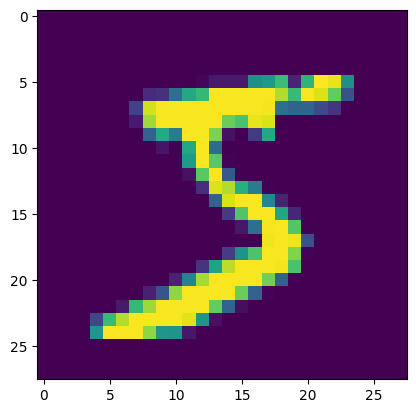

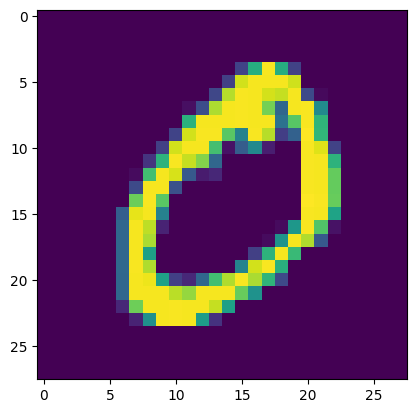

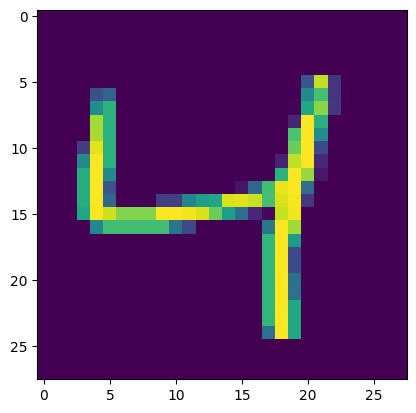

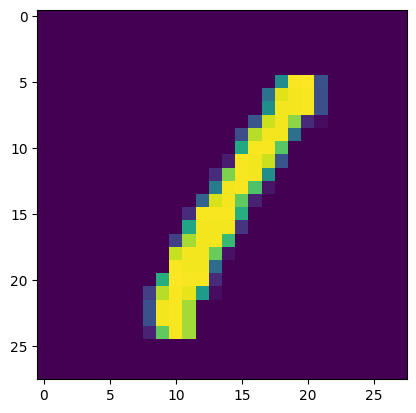

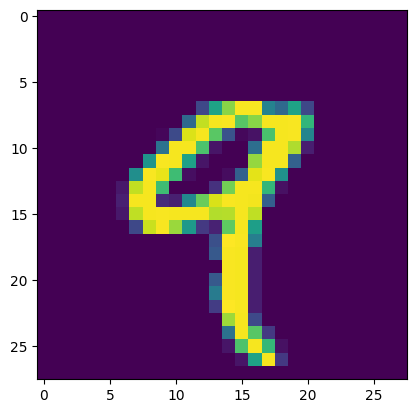

In [ ]:
X = df.drop(columns="class")
y = df["class"]
# I looped through the first 5 rows to display each one as an image.
for i in range(5):
    # I reshaped the row of 784 pixels into a 28x28 image and showed it.
    plt.imshow(X.iloc[i].values.reshape(28, 28))
    plt.show()

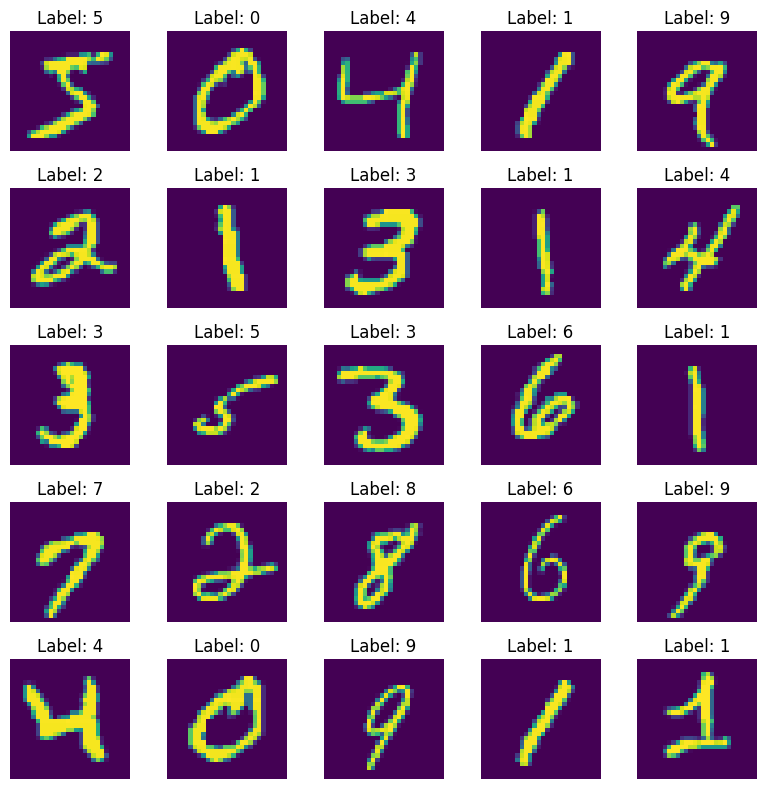

In [ ]:
fix, axes = plt.subplots(5, 5, figsize=(8, 8))
# I looped through each of the 25 plots in the grid.
for i, ax in enumerate(axes.flat):
    ax.imshow(X.iloc[i].values.reshape(28, 28))
    # I set the title of the plot to be the digit's actual label.
    ax.set_title(f'Label: {df["class"].iloc[i]}')
    ax.axis("off")
plt.tight_layout()
plt.show()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# I created my first model with only 1 neuron in the hidden layer.
mlp = MLPClassifier(hidden_layer_sizes=1, activation="relu", max_iter=10)
# I created a second model with 100 neurons in the hidden layer.
mlp1 = MLPClassifier(hidden_layer_sizes=100, activation="relu", max_iter=10)
# I created a third, more complex model with 1000 neurons.
mlp2 = MLPClassifier(hidden_layer_sizes=1000, activation="relu", max_iter=10)

#### Train models

In [ ]:
# I train the models
mlp.fit(X_train, y_train)
mlp1.fit(X_train, y_train)
mlp2.fit(X_train, y_train)

c:\Users\Jmnzb\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Jmnzb\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Jmnzb\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=1000, max_iter=10)

#### Evaluate the model

In [ ]:
# I used the models to make predictions on the test data.
prediction_NN = mlp.predict(X_test)
prediction_NN1 = mlp1.predict(X_test)
prediction_NN2 = mlp2.predict(X_test)

Actual value: 8
Predicted value: 1


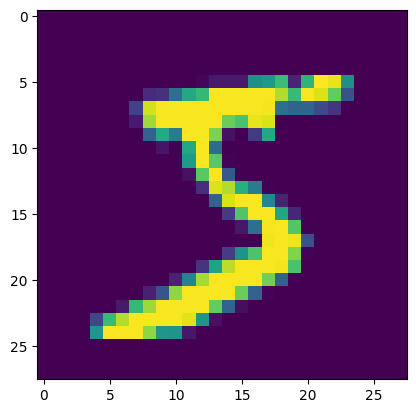

In [38]:
print(f'Actual value: {y_test.iloc[0]}')
print(f'Predicted value: {prediction_NN[0]}')

plt.imshow(X.iloc[0].values.reshape(28, 28))


#### Confusion matrix for 1 hidden layer

<Axes: >

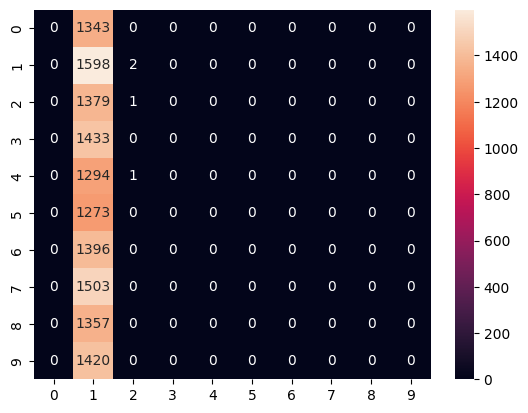

In [39]:
sns.heatmap(confusion_matrix(y_test, prediction_NN), fmt="d", annot=True)

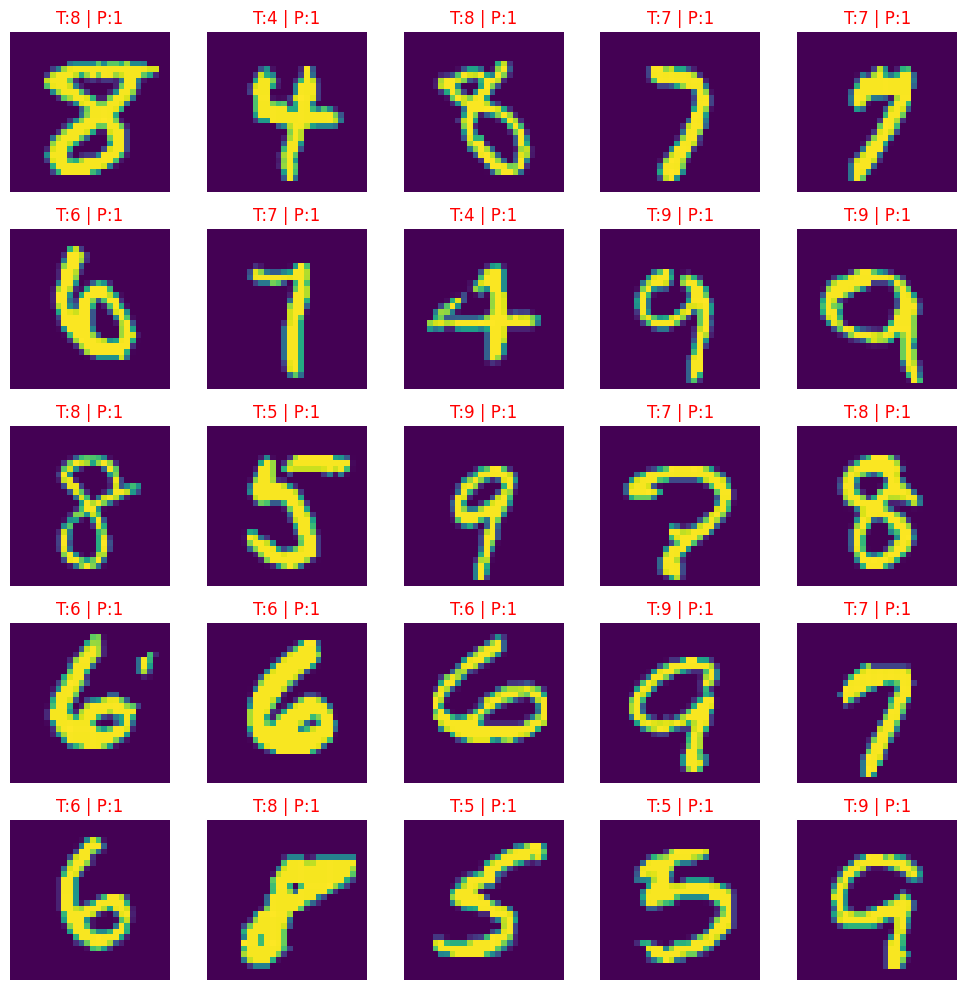

In [ ]:
# I created this code to visualize the specific images my model predicted incorrectly.
mask = y_test.isin([4, 5, 6, 7, 8, 9])
X_sel = X_test[mask].reset_index(drop=True)
y_true_sel = y_test[mask].reset_index(drop=True)
y_pred_sel = prediction_NN[mask]

error_mask = y_pred_sel != y_true_sel
y_true_sel = y_true_sel[error_mask].reset_index(drop=True)
y_pred_sel = y_pred_sel[error_mask]

fig, axes = plt.subplots(5, 5, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    if i >= len(X):
        break
    img = X_sel.iloc[i].values.reshape((28, 28))
    true_label = y_true_sel.iloc[i]
    pred_label = y_pred_sel[i]

    ax.imshow(img)
    ax.set_title(f'T:{true_label} | P:{pred_label}', color="green" if true_label == pred_label else "red")
    ax.axis("off")
plt.tight_layout()
plt.show()


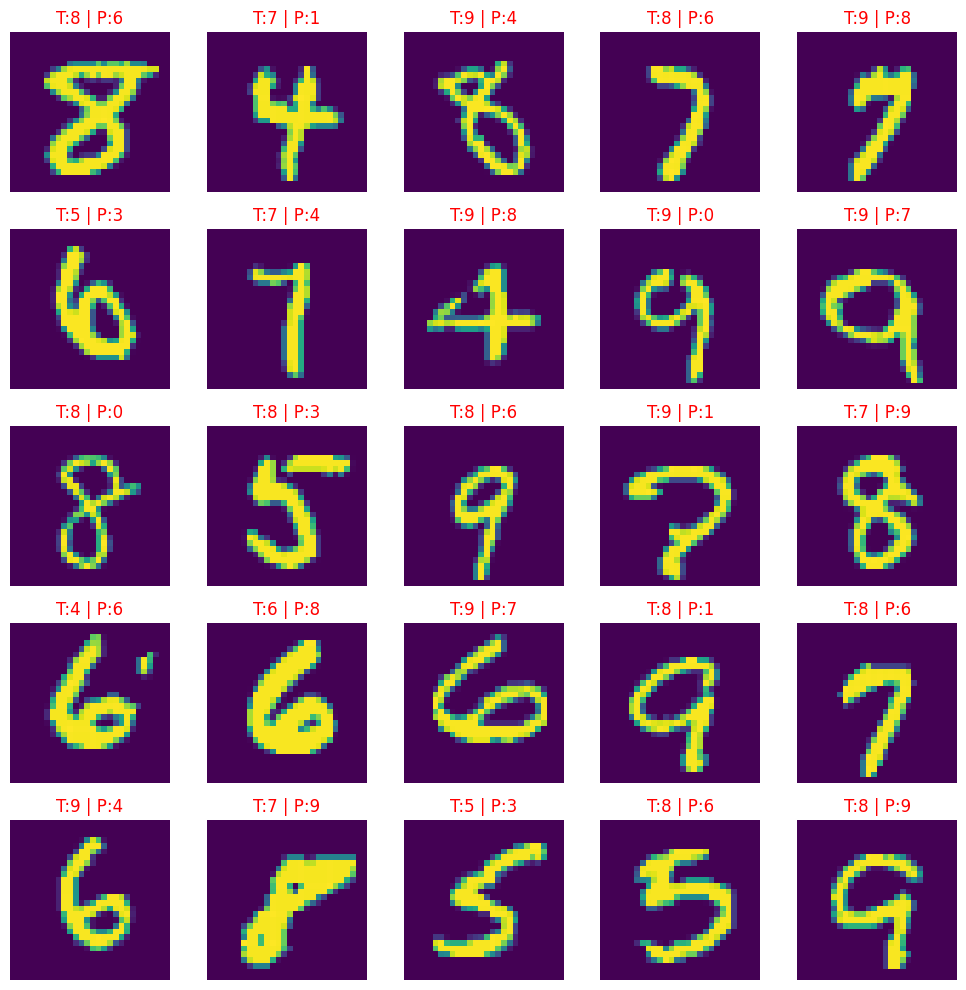

In [41]:
mask = y_test.isin([4, 5, 6, 7, 8, 9])
X_sel2 = X_test[mask].reset_index(drop=True)
y_true_sel2 = y_test[mask].reset_index(drop=True)
y_pred_sel2 = prediction_NN1[mask]

error_mask = y_pred_sel2 != y_true_sel2
y_true_sel2= y_true_sel2[error_mask].reset_index(drop=True)
y_pred_sel2 = y_pred_sel2[error_mask]

fig, axes = plt.subplots(5, 5, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    if i >= len(X):
        break
    img = X_sel2.iloc[i].values.reshape((28, 28))
    true_label2 = y_true_sel2.iloc[i]
    pred_label2 = y_pred_sel2[i]

    ax.imshow(img)
    ax.set_title(f'T:{true_label2} | P:{pred_label2}', color="green" if true_label2 == pred_label2 else "red")
    ax.axis("off")
plt.tight_layout()
plt.show()

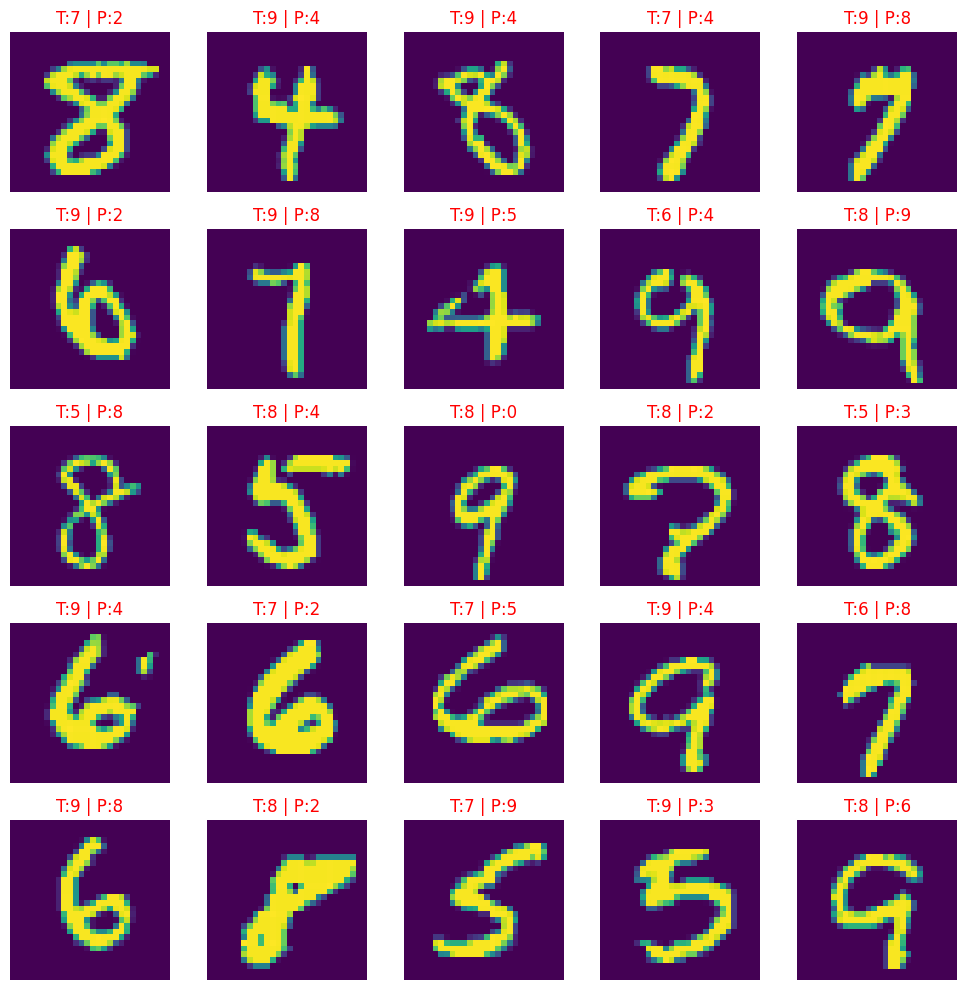

In [42]:
mask = y_test.isin([4, 5, 6, 7, 8, 9])
X_sel3 = X_test[mask].reset_index(drop=True)
y_true_sel3 = y_test[mask].reset_index(drop=True)
y_pred_sel3 = prediction_NN2[mask]

error_mask = y_pred_sel3 != y_true_sel3
y_true_sel3= y_true_sel3[error_mask].reset_index(drop=True)
y_pred_sel3 = y_pred_sel3[error_mask]

fig, axes = plt.subplots(5, 5, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    if i >= len(X):
        break
    img = X_sel3.iloc[i].values.reshape((28, 28))
    true_label3 = y_true_sel3.iloc[i]
    pred_label3 = y_pred_sel3[i]

    ax.imshow(img)
    ax.set_title(f'T:{true_label3} | P:{pred_label3}', color="green" if true_label3 == pred_label3 else "red")
    ax.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy for each model
acc_nn = accuracy_score(y_test, prediction_NN)
acc_nn1 = accuracy_score(y_test, prediction_NN1)
acc_nn2 = accuracy_score(y_test, prediction_NN2)

print(f"Model precision with 1 neuron (mlp): {acc_nn}")
print(f"Model precision with 100 neuron (mlp1): {acc_nn1}")
print(f"Model precision with 1000 neuron (mlp2): {acc_nn2}")

Model precision with 1 neuron (mlp): 0.11421428571428571
Model precision with 100 neuron (mlp1): 0.9358571428571428
Model precision with 1000 neuron (mlp2): 0.9647142857142857


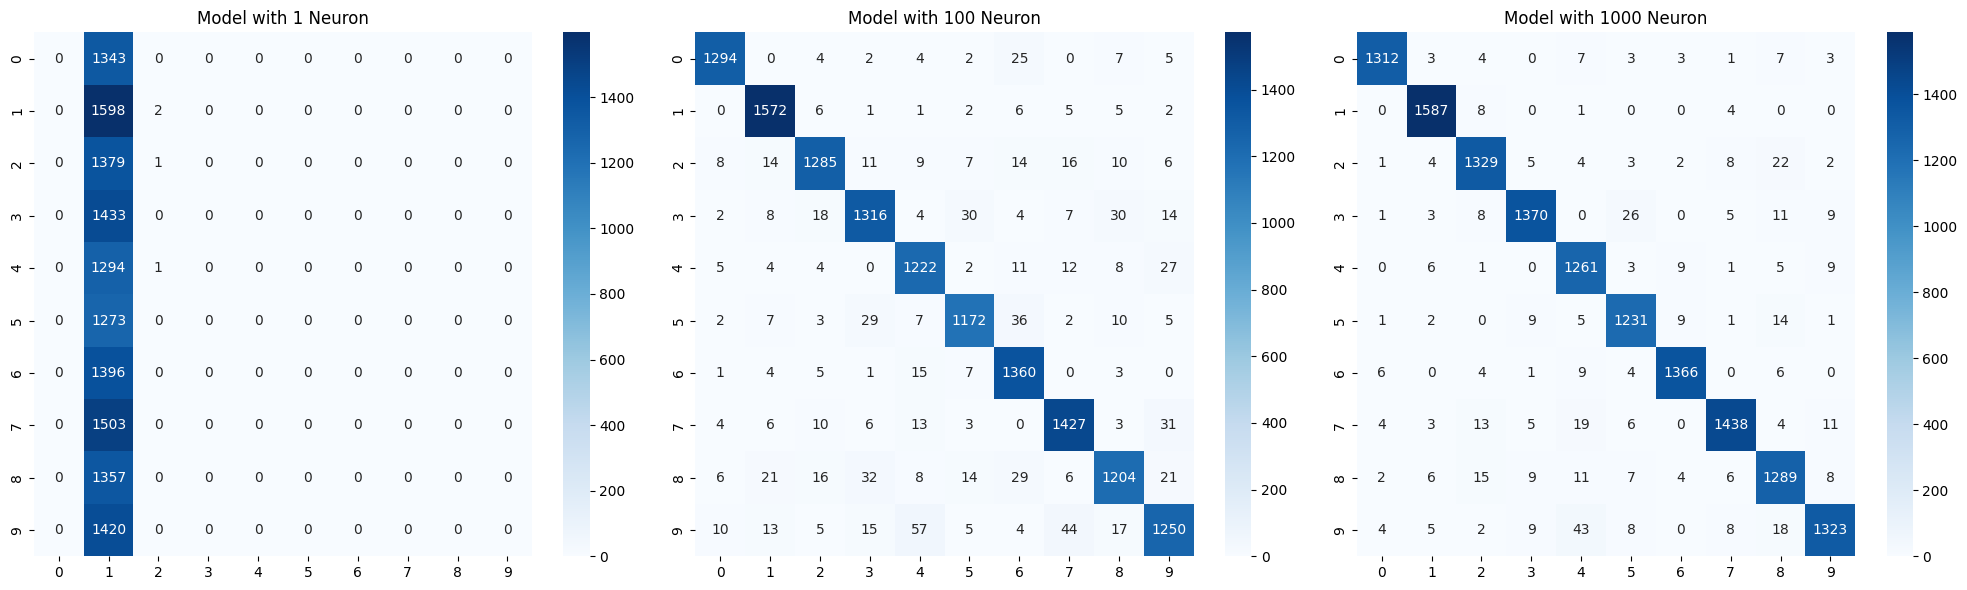

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create the three confusion matrices
cm_nn = confusion_matrix(y_test, prediction_NN)
cm_nn1 = confusion_matrix(y_test, prediction_NN1)
cm_nn2 = confusion_matrix(y_test, prediction_NN2)

# Graphing matrices side by side
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.heatmap(cm_nn, ax=axes[0], annot=True, fmt='d', cmap='Blues')
axes[0].set_title('Model with 1 Neuron')

sns.heatmap(cm_nn1, ax=axes[1], annot=True, fmt='d', cmap='Blues')
axes[1].set_title('Model with 100 Neuron')

sns.heatmap(cm_nn2, ax=axes[2], annot=True, fmt='d', cmap='Blues')
axes[2].set_title('Model with 1000 Neuron')

plt.tight_layout()
plt.show()

### MLP Model Comparison Table

| Model | Hyperparameters | Test Accuracy | My Observations |
| :--- | :--- | :--- | :--- |
| **Base MLP** | 1 hidden neuron | 11.4% | Very low performance; the model is too simple (underfitting). |
| **Intermediate MLP**| 100 hidden neurons | 93.6% | Excellent performance and a huge jump from the base model. |
| **Complex MLP** | 1000 hidden neurons | **96.5%** | **The best performance of the three.** The extra complexity helped. |

***

### Conclusion

After comparing the three models, my results show a clear pattern:

The model with **1 neuron** was too simple, and its **11.4%** accuracy is very low. When I increased the complexity to the model with **100 neurons**, the performance soared to **93.6%**, which showed that a more robust model was necessary.

Surprisingly, increasing the complexity even further to the **1000-neuron** model resulted in another improvement, reaching **96.5%** accuracy.

**Conclusion:** For this problem and with the training configuration I used, the most complex model (1000 neurons) was the best performer.